In [27]:
from typing import Callable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from lib.gradient_descent import descenso_gradiente_multi

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(formatter={'all': lambda x: '%.4f' % x})

### Direct method

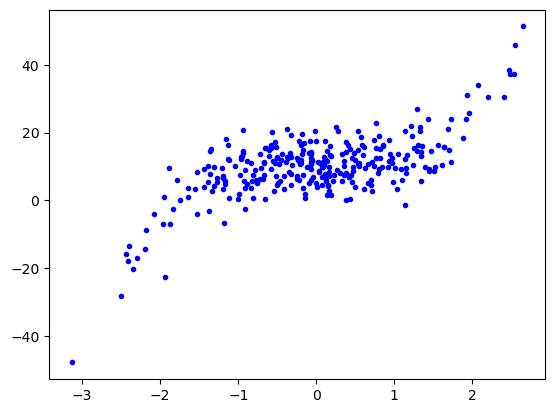

In [28]:
%matplotlib inline
np.random.seed(8)
x = np.random.randn(300, 1)
y = 2*(x**3) + 10 + 5 * np.random.randn(300,1)

plt.plot(x, y, 'b.')
plt.show()

In [29]:
def calc_weights_matrix(point, X, tau): 
    size = X.shape[0]
    w = np.mat(np.eye(size))
    for i in range(size): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        w[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
    return w

def predict(X, y, point, tau): 
    size = X.shape[0] 
    X_ = np.append(X, np.ones(size).reshape(size,1), axis=1) 
    point_ = np.array([point, 1]) 
    w = calc_weights_matrix(point_, X_, tau) 
    theta = np.linalg.pinv(X_.T*(w * X_))*(X_.T * (w * y)) 
    pred = np.dot(point_, theta) 
    return theta, pred

def plot_predictions(X, y, tau, nval, predict_fn: Callable = predict):
    X_test = np.linspace(-3, 3, nval) 
    preds = [] 
    for point in X_test: 
        theta, pred = predict_fn(X, y, point, tau) 
        preds.append(pred)
        
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    return X_test, preds

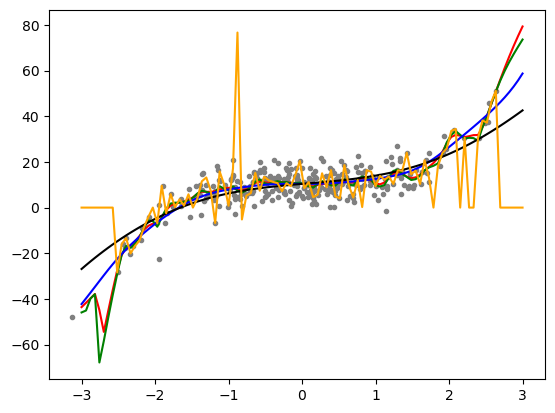

In [30]:
%matplotlib inline

x1, y1 = plot_predictions(x, y, 0.08, 100)
x2, y2 = plot_predictions(x, y, 0.05, 100)
x3, y3 = plot_predictions(x, y, 0.4, 100)
x4, y4 = plot_predictions(x, y, 1, 100)
x5, y5 = plot_predictions(x, y, 0.001, 100)

plt.plot(x, y, '.', color='gray')
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.plot(x4, y4, color='black')
plt.plot(x5, y5, color='orange')
plt.show()

### calc using gradient descent

In [31]:
def calc_weights_matrix2(point, X, tau): 
    calc_w = lambda xi, p, tau: np.exp(np.dot((xi-p), (xi-p).T)/(-2 * tau * tau))
    w_v = np.array([calc_w(X[i], point, tau) for i in range(X.shape[0])])
    return w_v.T * np.eye(X.shape[0])

def predict2(x, y, point, tau):
    tmp_x = np.column_stack((np.ones(x.shape[0]), x))
    tmp_point = np.array([1, point]) 
    w = calc_weights_matrix2(tmp_point, tmp_x, tau)

    h = lambda theta, x: np.dot(x, theta)
    j = lambda theta, x, y: np.sum(np.dot(w, (h(theta, x) - y)**2))
    grad = lambda theta, x, y: np.dot(x.T @ w, (h(theta, x) - y)) / x.shape[0]

    result = descenso_gradiente_multi(
        x,
        y,
        fn = h,
        cost_fn = j,
        grad_fn = grad,
        alpha = 0.005,
        error = 0.0001,
        max_iter = 10000,
    )
    theta = result['theta']
    pred = np.dot(tmp_point, theta) 
    return theta, pred

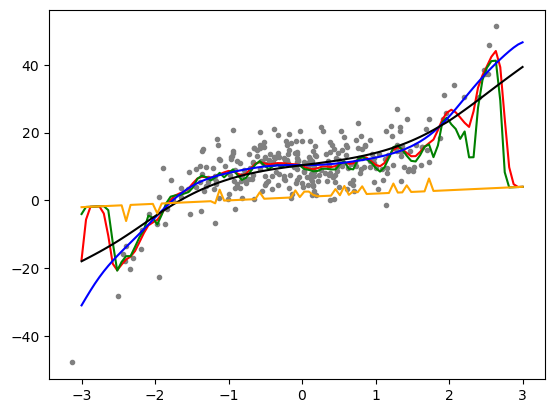

In [32]:
%matplotlib inline

x1, y1 = plot_predictions(x, y, 0.08, 100, predict_fn = predict2)
x2, y2 = plot_predictions(x, y, 0.05, 100, predict_fn = predict2)
x3, y3 = plot_predictions(x, y, 0.4, 100, predict_fn = predict2)
x4, y4 = plot_predictions(x, y, 1, 100, predict_fn = predict2)
x5, y5 = plot_predictions(x, y, 0.001, 100, predict_fn = predict2)

plt.plot(x, y, '.', color='gray')
plt.plot(x1, y1, 'r')
plt.plot(x2, y2, 'g')
plt.plot(x3, y3, 'b')
plt.plot(x4, y4, color='black')
plt.plot(x5, y5, color='orange')
plt.show()